<a href="https://colab.research.google.com/github/avishank-dwivedi/Pytorch-Framework/blob/main/10ANN_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
df = pd.read_csv("fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(10000, 785)

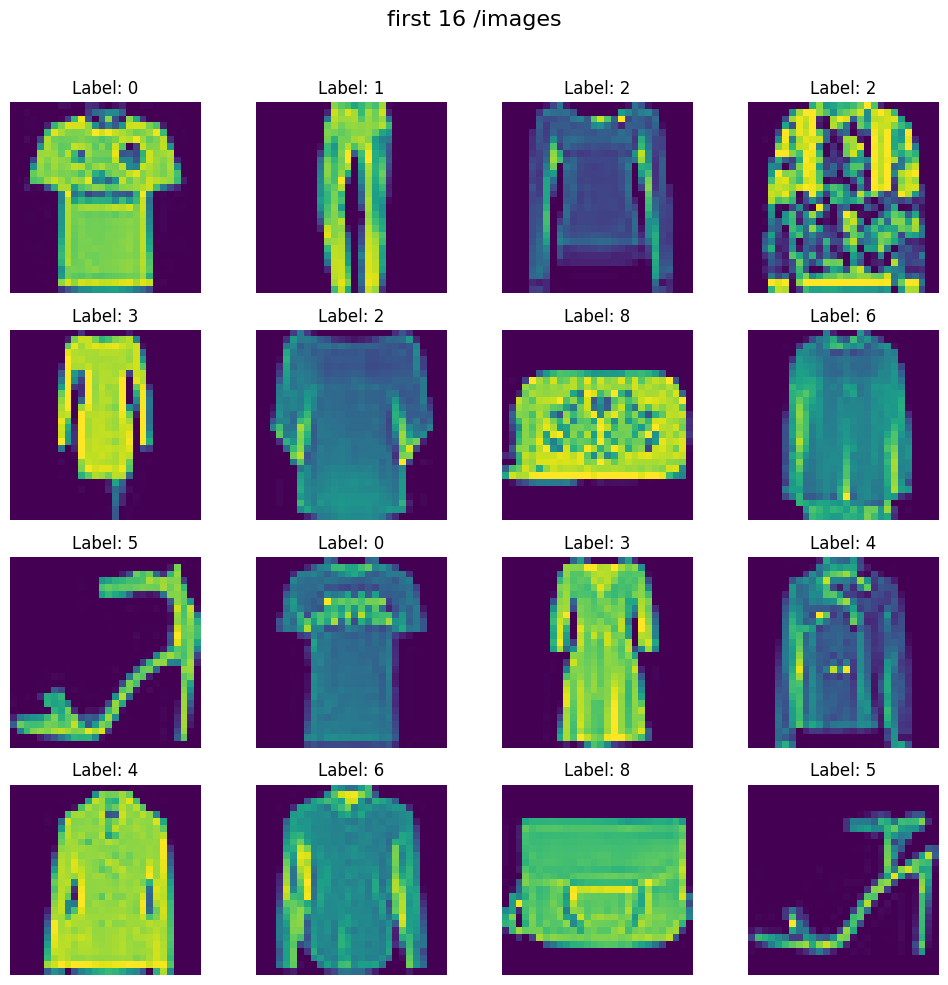

In [ ]:
#create a 4*4 grid of images
fig, axes = plt.subplots(4 , 4 , figsize=(10 , 10))
fig.suptitle("first 16 /images" , fontsize=16)

#plot the first 16 image from the dataset
for i , ax in enumerate(axes.flat):
    img = df.iloc[i , 1:].values.reshape(28 , 28) #Reshape to 28*28
    ax.imshow(img)# display in grayscale
    ax.axis('off') # Remove axis for a clear look
    ax.set_title(f"Label: {df.iloc[i , 0]}") #show the label

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

In [ ]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#scaling the feature
x_train = X_train / 255.0
x_test = X_test / 255.05

In [ ]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45098039, 0.1372549 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#crete custom dataset class
class CustomDataset(Dataset):
  def __init__(self , features , labels):
    self.features =torch.tensor(features , dtype=torch.float32)
    self.labels = torch.tensor(labels , dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self , idx):
    return self.features[idx] , self.labels[idx]

In [ ]:
#create train dataset object
train_dataset = CustomDataset(x_train , y_train)

In [ ]:
len(train_dataset)

8000

In [ ]:
#create test_dataset  object
test_dataset = CustomDataset(x_test , y_test)

In [ ]:
len(test_dataset)

2000

In [ ]:
#create train and test loader
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True)
test_loader = DataLoader(test_dataset , batch_size=32 , shuffle=False)

In [ ]:
#define  NN class

class MyNN(nn.Module):
  def __init__(self , new_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(new_features , 128),
        nn.ReLU(),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Linear(64 , 10)
    )

  def forward(self , x):
    return self.model(x)

In [ ]:
#set learning rate and epochs
learning_rate = 0.001
epochs = 100

In [ ]:
#initialize the model
model = MyNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters() , lr=learning_rate)

In [ ]:
#training loop

for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:
    #forward pass
    output = model(batch_features)

    #calculate loss
    loss = criterion(output , batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()
  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch {epoch+1}/{epochs} , Loss : {avg_loss}")

Epoch 1/100 , Loss : 2.2975646991729737
Epoch 2/100 , Loss : 2.2744469575881956
Epoch 3/100 , Loss : 2.251522254943848
Epoch 4/100 , Loss : 2.2261073980331423
Epoch 5/100 , Loss : 2.195514247894287
Epoch 6/100 , Loss : 2.1585581293106078
Epoch 7/100 , Loss : 2.113210988044739
Epoch 8/100 , Loss : 2.056318103313446
Epoch 9/100 , Loss : 1.988385066986084
Epoch 10/100 , Loss : 1.911055790424347
Epoch 11/100 , Loss : 1.8264941692352294
Epoch 12/100 , Loss : 1.739262074947357
Epoch 13/100 , Loss : 1.6533391499519348
Epoch 14/100 , Loss : 1.5717152070999145
Epoch 15/100 , Loss : 1.4958460636138915
Epoch 16/100 , Loss : 1.4268085608482362
Epoch 17/100 , Loss : 1.3640594844818115
Epoch 18/100 , Loss : 1.307828751564026
Epoch 19/100 , Loss : 1.2569824781417847
Epoch 20/100 , Loss : 1.2111564853191377
Epoch 21/100 , Loss : 1.1695742993354796
Epoch 22/100 , Loss : 1.1320921330451965
Epoch 23/100 , Loss : 1.0980064392089843
Epoch 24/100 , Loss : 1.066915439605713
Epoch 25/100 , Loss : 1.0384489479

In [ ]:
#set model to eval mode

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#evaluation code

total =0
correct = 0

with torch.no_grad():
  for batch_features , batch_labels in test_loader:

    output = model(batch_features)

    _,predicted = torch.max(output.data , 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()
print(correct/total)

0.819
